# Web Scraping 

Working on Textual data to understand the overall conditions related to the company. 


In [32]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit

import requests
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
from html.parser import HTMLParser

import bs4 as bs
import urllib.request
import re
import string

In [33]:
#we are using request package to make a GET request for the website, which means we're getting data from it.

r=requests.get('https://www.businesswire.com/news/home/20200624005438/en/Waste-Management-Advanced-Disposal-Announce-Revised-Terms')

In [34]:
#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

In [35]:
#Extracting the HTML from the request object
html = r.text

In [36]:
# Printing the first 500 characters in html
print(html[:500])

<!doctype html>





<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]-->
<head>
	<meta charset="utf-8" />
	<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
	<title>Waste Management and Advanced Disposal Announce Revised Terms


In [37]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

In [38]:
# Getting the text out of the soup
text = soup.get_text()

In [39]:
#total length
len(text)

48610

In [40]:
text=text[17300:31000]

In [41]:
text_nopunct=''

text_nopunct= "".join([char for char in text if char not in string.punctuation])

In [42]:
len(text_nopunct)

13412

In [43]:
text_nopunct[500:1500]

'sal also announced today that they have entered into an agreement for GFL Environmental to acquire a combination of Advanced Disposal and Waste Management assets for 835 million representing approximately 345 million in total revenue based on 2019 results Approximately 300 million of the total revenue is related to assets and businesses being sold to GFL Environmental to address substantially all of the divestitures expected to be required by the US Department of Justice As with the Advanced Disposal acquisition the sale of assets to GFL Environmental remains subject to clearance from the US Department of Justice and is also conditioned on the closing of Waste Management’s acquisition of Advanced Disposal\n\n\n“We continue to be excited by the compelling strategic rationale and financial benefits of the Advanced Disposal acquisition” said Jim Fish President and Chief Executive Officer of Waste Management “Over the last several months as we have worked to gain regulatory approval from 

In [44]:
text_nopunct=text_nopunct.strip('\n')
text_nopunct=text_nopunct.strip('\n\n')
text_nopunct=text_nopunct.strip('\n\n\n')

In [46]:
text_nopunct[500:1500]

'sal also announced today that they have entered into an agreement for GFL Environmental to acquire a combination of Advanced Disposal and Waste Management assets for 835 million representing approximately 345 million in total revenue based on 2019 results Approximately 300 million of the total revenue is related to assets and businesses being sold to GFL Environmental to address substantially all of the divestitures expected to be required by the US Department of Justice As with the Advanced Disposal acquisition the sale of assets to GFL Environmental remains subject to clearance from the US Department of Justice and is also conditioned on the closing of Waste Management’s acquisition of Advanced Disposal\n\n\n“We continue to be excited by the compelling strategic rationale and financial benefits of the Advanced Disposal acquisition” said Jim Fish President and Chief Executive Officer of Waste Management “Over the last several months as we have worked to gain regulatory approval from 

In [47]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [48]:
#Tokenizing the text
tokens = tokenizer.tokenize(text_nopunct)

In [49]:
len(tokens)

1959

In [50]:
print(tokens[0:20])

['ern', 'Daylight', 'Time', 'HOUSTON', 'PONTE', 'VEDRA', 'FlaBUSINESS', 'WIREWaste', 'Management', 'Inc', 'NYSE', 'WM', 'and', 'Advanced', 'Disposal', 'Services', 'Inc', 'NYSE', 'ADSW', 'announced']


In [51]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [53]:
print(words[0:50])

['ern', 'daylight', 'time', 'houston', 'ponte', 'vedra', 'flabusiness', 'wirewaste', 'management', 'inc', 'nyse', 'wm', 'and', 'advanced', 'disposal', 'services', 'inc', 'nyse', 'adsw', 'announced', 'today', 'that', 'they', 'have', 'amended', 'the', 'terms', 'of', 'the', 'definitive', 'agreement', 'under', 'which', 'a', 'subsidiary', 'of', 'waste', 'management', 'will', 'acquire', 'all', 'outstanding', 'shares', 'of', 'advanced', 'disposal', 'for', '3030', 'per', 'share']


In [54]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.

stopwords = nltk.corpus.stopwords.words('english')

In [55]:
words_new = []

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words:
    if word not in stopwords:
        words_new.append(word)

In [56]:
len(words_new)

1240

# Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word. Lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

In [62]:
from nltk.stem import WordNetLemmatizer 
  
wn = WordNetLemmatizer() 


In [63]:
lem_words=[]

for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)
    

In [64]:
len(lem_words)

1240

In [66]:
same=0
diff=0

for i in range(0,1240):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1

In [67]:
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 165
Number of words not Lemmatized= 1075


In [68]:
#This shows that lemmatization helps to process the data efficiently.
#It is used in- 
# 1. Comprehensive retrieval systems like search engines.
# 2. Compact indexing

In [69]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)

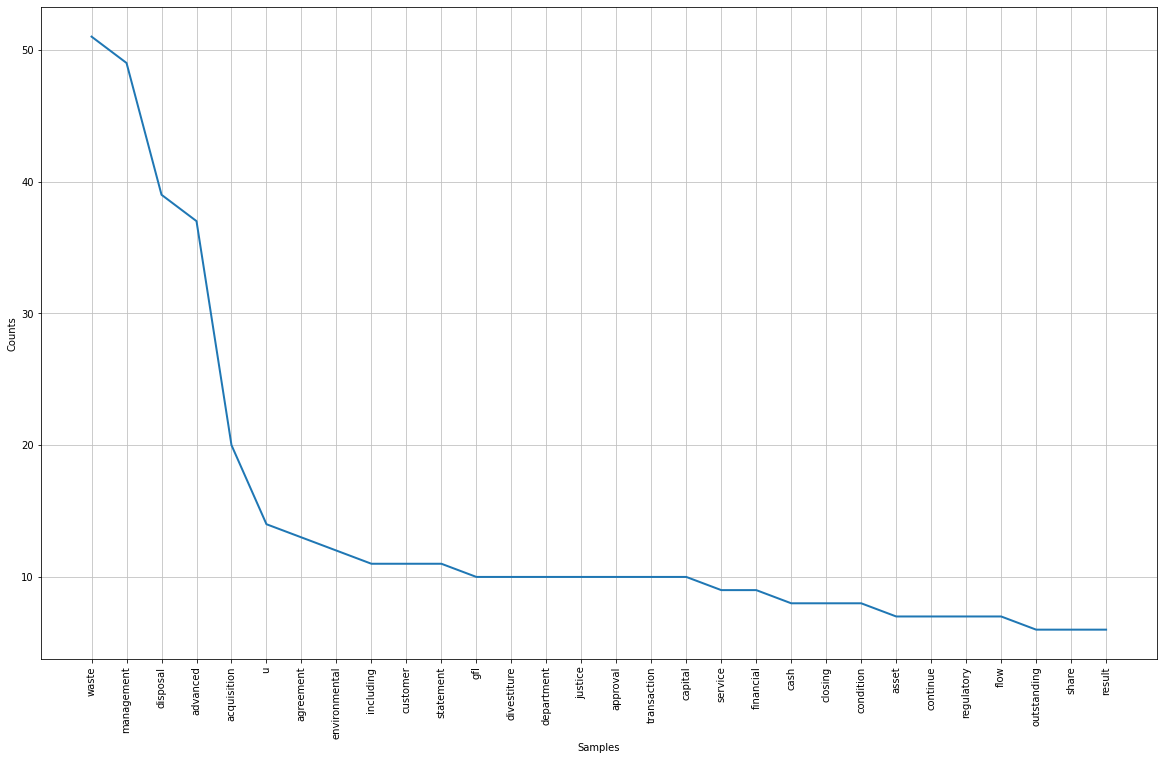

In [72]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [73]:
#converting into string

res=' '.join([i for i in lem_words if not i.isdigit()])

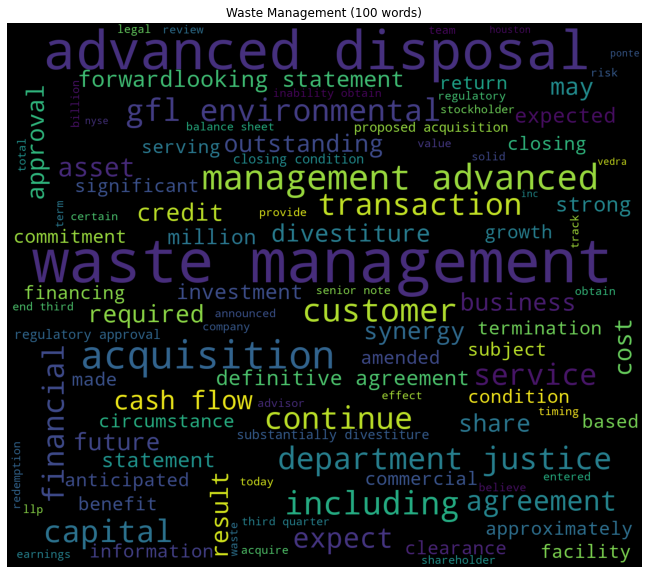

In [75]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('Waste Management (100 words)')
plt.axis('off')
plt.show()

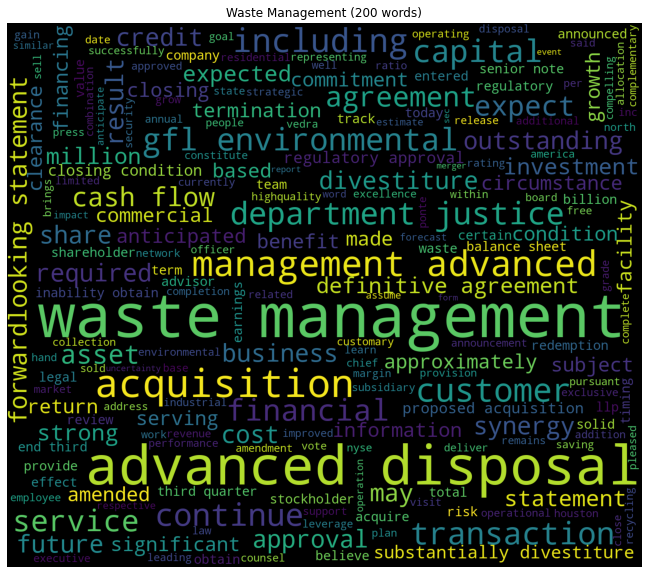

In [76]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('Waste Management (200 words)')
plt.axis('off')
plt.show()

# Inferences from Word Cloud



Words finding large sizes are- Waste Management, which is kind of obvious as that is the company name and what they do. 

Then there is advanced disposal, which is one of their key services. They provide well managed waste disposal. 

Advanced management, cashflow, customer, commercial, environmental are other words having good visibility. 

All the words in the Word Cloud are such which have high mentions in the article. 

These are the key areas in which the company focuses. 

